# Week 4 handin

#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


In [1]:
import matplotlib.pyplot as plt
import numpy as np

filename = './data/befkbhalderstatkode.csv'

stats = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

[['3872' 'Udenfor']
 ['39537' 'Vanløse']
 ['43908' 'Brønshøj-Husum']
 ['51727' 'Valby']
 ['51937' 'Indre By']
 ['53604' 'Bispebjerg']
 ['55205' 'Amager Øst']
 ['61623' 'Vesterbro/Kgs. Enghave']
 ['64967' 'Amager Vest']
 ['75113' 'Østerbro']
 ['78802' 'Nørrebro']]


<BarContainer object of 11 artists>

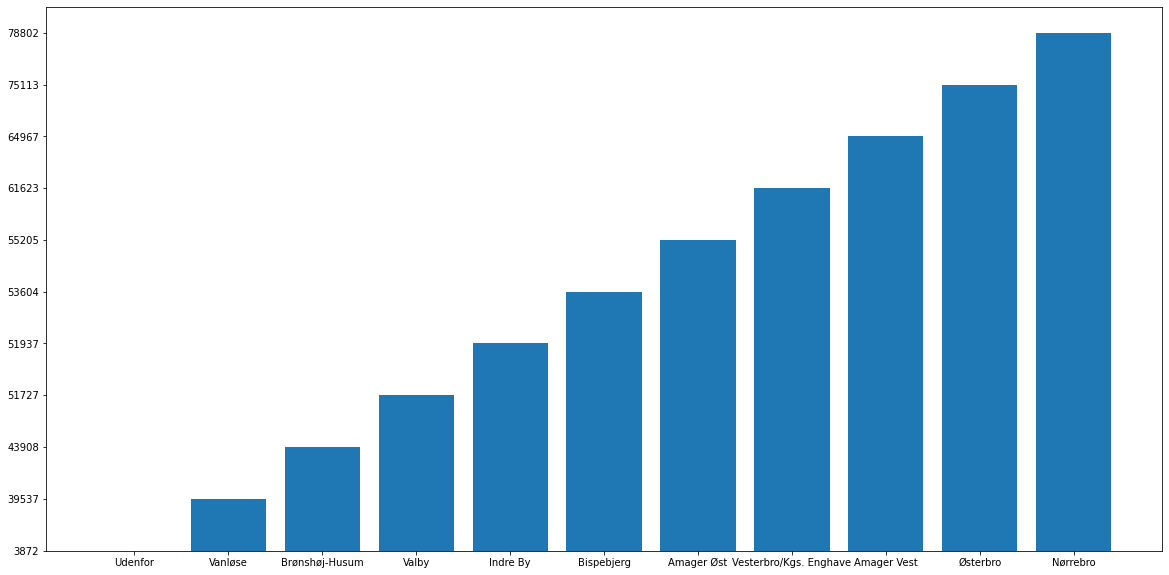

In [2]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_in_neigborhood(n, mask):
    all_people_in_given_n = stats[mask & (stats[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

alle_indbyggere_mask = (stats[:,0] == 2015)
alle_indbyggere = np.array([(number_of_people_in_neigborhood(n , alle_indbyggere_mask),neighb[n]) for n in neighb])
#print(alle_indbyggere)



sorted_alle_indbyggere = alle_indbyggere[alle_indbyggere[:,0].argsort()]
print(sorted_alle_indbyggere)
plt.figure(figsize =(20,10))
plt.bar(sorted_alle_indbyggere[:,1], sorted_alle_indbyggere[:,0])


In [3]:
age_mask = (stats[:,0] == 2015) & (stats[:,2] >= 65)
np.sum(stats[age_mask][:,4])



59859

In [4]:
country_mask = (stats[:,2] >= 65) & (stats[:,0] == 2015) & (stats[:,3] == 5120)
sverige = np.sum(stats[country_mask][:,4])
country_mask = (stats[:,2] >= 65) & (stats[:,0] == 2015) & (stats[:,3] == 5110)
norge = np.sum(stats[country_mask][:,4])
country_mask = (stats[:,2] >= 65) & (stats[:,0] == 2015) & (stats[:,3] == 5104)
finland = np.sum(stats[country_mask][:,4])

old_above_65_nordic = sverige + norge + finland

print(old_above_65_nordic)

614


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f92c1ccaa10>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f92c1ccaf90>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


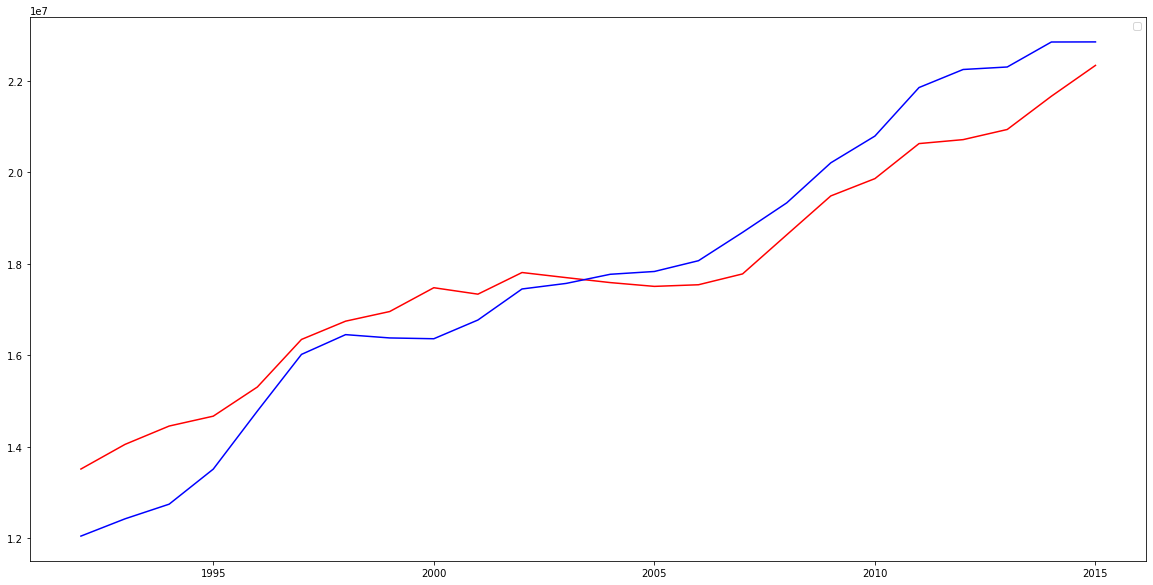

In [15]:
vesterbro_mask = stats[:,1] == 4
osterbro_mask = stats[:,1] == 2

set_of_year_v = np.unique(stats[:,0])
freq_population_v = np.array([np.sum(stats[vesterbro_mask & (stats[:,0] == year)])
                           for year in set_of_year])


set_of_year_o = np.unique(stats[:,0])
freq_population_o = np.array([np.sum(stats[osterbro_mask & (stats[:,0] == year)])
                           for year in set_of_year])


plt.figure(figsize =(20,10))
p1 = plt.plot(set_of_year_v,freq_population_v, color='red', label='Vesterbro')
p2 = plt.plot(set_of_year_o,freq_population_o, color='blue', label='Østerbro')
plt.legend()   